In [1]:
] instantiate

In [2]:
using Arrow
using DataFrames
using MultivariateStats
using Plots

# Steps 1-3, loading data

In [3]:
sales_df = DataFrame(Arrow.Table("sales_norm.arrow"))
sales_mat = Matrix(sales_df)

52×811 Matrix{Float64}:
  0.369588    1.27724     -0.579404  …   0.571772  -0.594121  -0.438798
  0.640272    0.854207     0.790096     -0.571772  -0.594121   0.987295
  0.0989037  -0.414901    -0.237029     -0.571772  -0.594121  -0.438798
 -0.442464   -0.837937     0.105346     -0.571772   1.22319   -0.438798
  0.910956    1.27724      0.447721      0.571772  -0.594121  -0.438798
  0.640272   -1.26097     -0.237029  …   0.571772  -0.594121  -0.438798
  1.18164     0.854207    -0.579404      1.71532   -0.594121  -0.438798
  3.07643    -0.414901     1.47485       0.571772  -0.594121  -0.438798
 -0.983832   -0.414901     1.13247       0.571772   1.22319   -0.438798
  1.18164    -0.414901    -0.921779     -0.571772  -0.594121  -0.438798
  0.369588   -0.837937     1.81722   …  -0.571772  -0.594121  -0.438798
  1.18164    -0.837937     0.105346      0.571772  -0.594121  -0.438798
  1.72301     0.854207    -1.60653      -0.571772  -0.594121  -0.438798
  ⋮                                  ⋱  

In [4]:
kmeans_result = parse.(Int64, readlines("kmeans_assignments.txt"))
dbscan_result = parse.(Int64, readlines("dbscan_assignments.txt"));

# Step 4: projection

In [5]:
pca = fit(PCA, sales_mat, maxoutdim=2)
pca_embed = MultivariateStats.transform(pca, sales_mat)

2×811 Matrix{Float64}:
  2.2184    1.33473   0.945394   0.999007  …  -2.46781  -2.0097     -0.481417
 -1.40107  -1.01582  -0.647423  -1.26504      -0.27575   0.0802974  -1.77121

# Steps 5-8: plotting

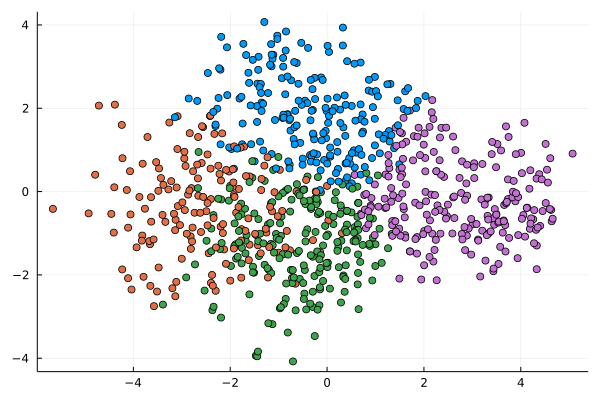

In [6]:
scatter(eachrow(pca_embed)..., color=kmeans_result, label=nothing)

In [7]:
extr_x, extr_y = extrema.(eachrow(pca_embed))

2-element Vector{Tuple{Float64, Float64}}:
 (-5.661723666003585, 5.069822053370336)
 (-4.077310483265627, 4.070892769420837)

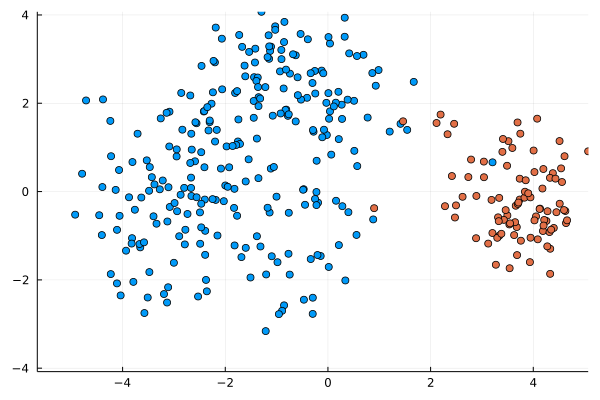

In [8]:
relevant = dbscan_result .!= 0  # no outliers
scatter(eachrow(pca_embed[:, relevant])..., color=dbscan_result[relevant], label=nothing, xlim=extr_x, ylim=extr_y)

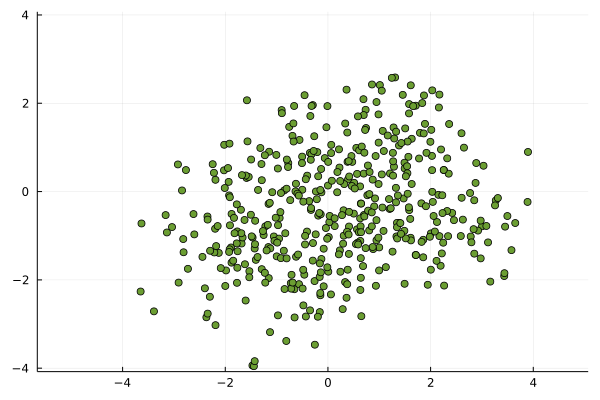

In [9]:
outliers = dbscan_result .== 0
scatter(eachrow(pca_embed[:, outliers])..., color=dbscan_result[outliers], label=nothing, xlim=extr_x, ylim=extr_y)

# Steps 9-11: explained variance

In [10]:
function expl_var(numdim)
    pca = fit(PCA, sales_mat, maxoutdim=numdim)
    pca.tprinvar / pca.tvar
end
expl_vars = [expl_var(i) for i in 1:50]

50-element Vector{Float64}:
 0.09353391978077295
 0.14016133625406882
 0.17156542042900885
 0.20174224208518715
 0.22974182982762495
 0.2568352712338874
 0.28249476807215845
 0.3074753187164961
 0.3313292787414106
 0.3550049935594051
 0.37802693165148626
 0.40029376549129825
 0.4215804947884371
 ⋮
 0.8641042128430719
 0.8771275208121608
 0.8895432054582234
 0.9018871631099957
 0.9137289035433145
 0.9254509165402831
 0.9370369127617239
 0.9481855840144807
 0.9589980005552722
 0.9696002031197816
 0.9800120905326145
 0.9902104573627569

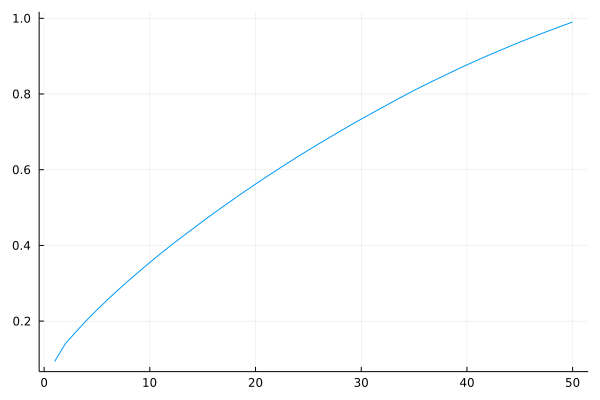

In [11]:
plot(expl_vars, legend=false)

In [12]:
[ "$(round(x * 100, digits=2))%" for x ∈ expl_vars[2:3] ]

2-element Vector{String}:
 "14.02%"
 "17.16%"

# Steps 12-15: more plotting

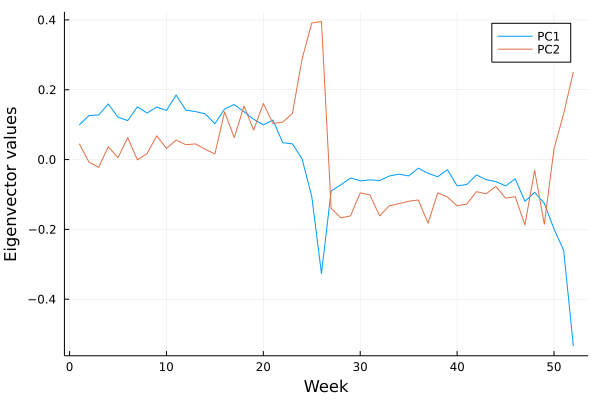

In [13]:
plot(pca.proj, xlabel="Week", ylabel="Eigenvector values", labels=["PC1" "PC2"])

In [14]:
plotly()

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots C:\Users\alexe\.julia\packages\Plots\HcxwM\src\backends.jl:435


Plots.PlotlyBackend()

In [15]:
pca3 = fit(PCA, sales_mat, maxoutdim=3)

PCA(indim = 52, outdim = 3, principalratio = 0.17156542042900885)

In [16]:
pca3_embed = MultivariateStats.transform(pca3, sales_mat)

3×811 Matrix{Float64}:
  2.2184    1.33473    0.945394  …  -2.46781     -2.0097     -0.481417
 -1.40107  -1.01582   -0.647423     -0.27575      0.0802974  -1.77121
  2.93138  -0.615491  -1.40763      -0.00631181  -1.53485     0.0834495

In [17]:
scatter(eachrow(pca3_embed)..., color=kmeans_result, label=nothing, markersize=1) 

In [18]:
scatter(eachrow(pca3_embed)..., color=dbscan_result, label=nothing, markersize=1) 